Below is a step-by-step guide on how to structure an ANN-based regression project using a common dataset. We will use Python, along with libraries like TensorFlow (or Keras) and Scikit-learn.

PROJECT DETAILS:
One of the most popular regression datasets is the Boston Housing Dataset (or any similar housing price dataset). The goal is to predict the price of a house based on various features, such as the number of rooms, location, crime rate, etc.

Define the Problem:

Objective: Build an ANN to predict house prices based on the features of houses.

Dataset: Use a dataset that includes features such as house size, number of rooms, crime rate in the area, etc.
Example Dataset: Boston Housing, or similar datasets from Kaggle (like "California Housing Prices" dataset).


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [11]:
boston = fetch_california_housing()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='Price')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build the ANN Model

In this step, you’ll define the architecture of your ANN using Keras (part of TensorFlow). For regression, your output layer will have a single node (for predicting continuous values), and you'll use a loss function like Mean Squared Error (MSE).

In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model =Sequential()

In [17]:
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))


C:\Users\chand\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [21]:
history = model.fit(X_train_scaled,y_train, validation_data=(X_test_scaled, y_test), epochs =10, batch_size =32, verbose=1)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.7658 - mae: 0.9164 - val_loss: 0.4287 - val_mae: 0.4689
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3991 - mae: 0.4506 - val_loss: 0.3826 - val_mae: 0.4427
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3652 - mae: 0.4331 - val_loss: 0.3653 - val_mae: 0.4395
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3547 - mae: 0.4211 - val_loss: 0.3448 - val_mae: 0.4174
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3364 - mae: 0.4075 - val_loss: 0.3374 - val_mae: 0.4110
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3188 - mae: 0.3963 - val_loss: 0.3273 - val_mae: 0.3904
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3168 - mae: 0.3900 - val_loss: 0.3216 - val_mae: 0.3989
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3055 - mae: 0.3858 - val_loss: 0.3189 - val_mae: 0.3806
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Evaluate the Model

After training, evaluate the model's performance on the test data and compare the predicted values against the actual values. You can use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to assess how well the model performs.

In [22]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2984 - mae: 0.3735
Test Mean Absolute Error: 0.38
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
        Actual  Predicted
20046  0.47700   0.481239
3024   0.45800   1.065866
15663  5.00001   4.723978
20484  2.18600   2.409292
9814   2.78000   2.861480


Visualize the Results

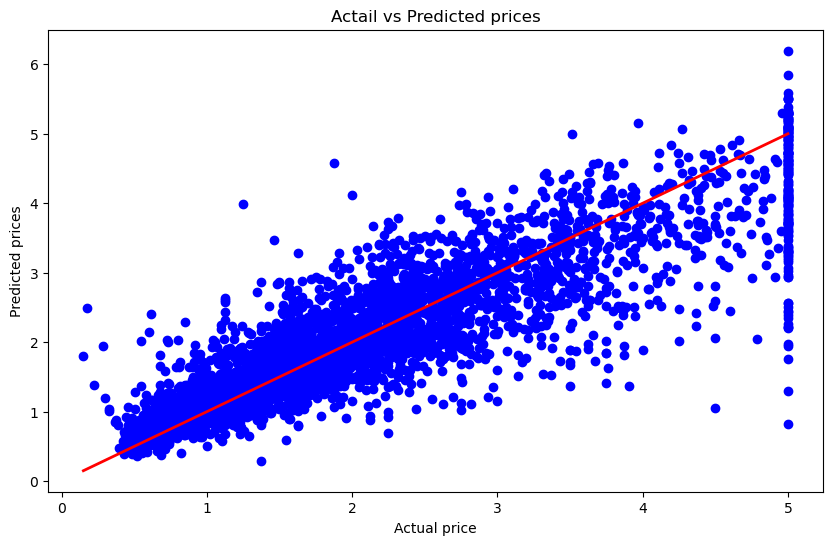

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred.flatten(), color ='blue')

plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)],color='red',linewidth=2)

plt.xlabel('Actual price')
plt.ylabel('Predicted prices')

plt.title('Actail vs Predicted prices')

plt.show()

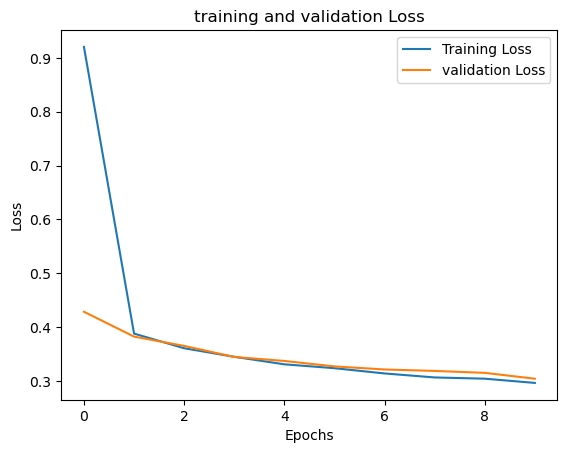

In [25]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label ='validation Loss')
plt.title('training and validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()
plt.show()

Model Deployment for deloy using flask

In [26]:
model.save('house_price_prediction_model.h5')

Conclusion and Summary

Summarize the findings and improvements in your project:

Discuss the model’s performance (e.g., how close the predicted prices are to actual house prices).
Outline any improvements made, such as reducing overfitting or enhancing accuracy through hyperparameter tuning.

Fine-Tune the Model

If your model's performance is not satisfactory, we can use the tunning methods like

Hyperparameter tuning: Adjust the number of layers, number of neurons, batch size, learning rate, etc.

Regularization techniques: Add dropout layers to reduce overfitting.

Feature Engineering: Add more features or perform feature selection to improve accuracy